In [1]:
import os
import pandas as pd
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
folder = 'email/'
file_name = 'email.tsv'

In [3]:
file_path = os.path.join(folder, file_name)
file_path

'email/email.tsv'

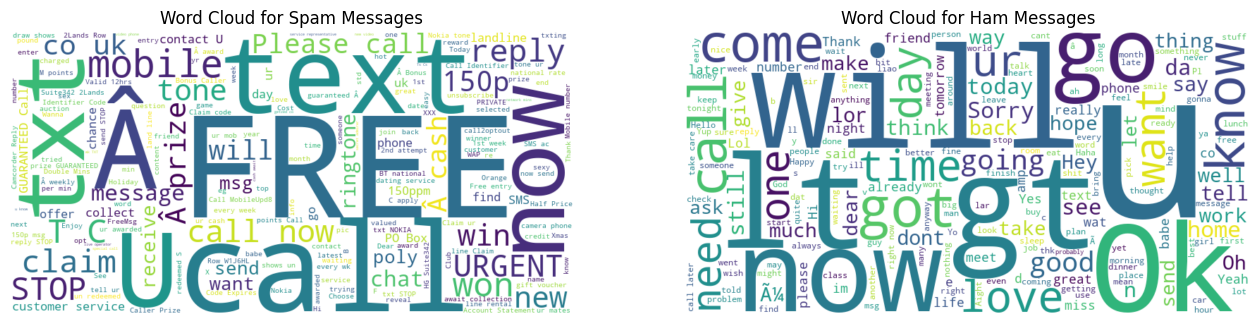

In [4]:
# file_path = 'your_file.tsv'
df = pd.read_csv(file_path, sep='\t', encoding='latin-1')
df.drop(['length','punct'],inplace = True,axis=1)
df.columns = ['label', 'message']  # Adjust the column names as needed

# Initialize empty lists to store words
spam_words = []
ham_words = []

# Process spam messages
spam_messages = df[df['label'] == 'spam']['message']

# Process ham messages
ham_messages = df[df['label'] == 'ham']['message']


spam_text = ' '.join(spam_messages)

# Join all ham messages into a single string
ham_text = ' '.join(ham_messages)

# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Plotting the Word Clouds
plt.figure(figsize=(16, 8))

# Word cloud for Spam
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')

# Word cloud for Ham
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')

plt.show()

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


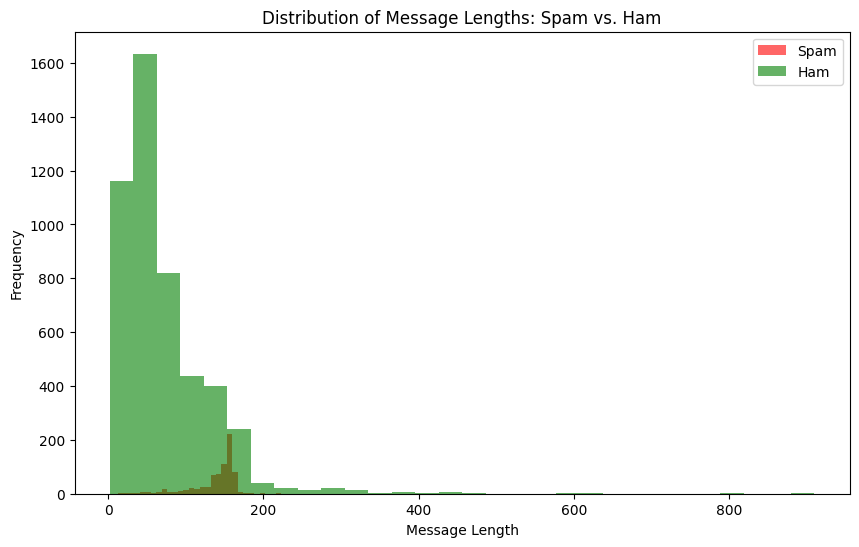

In [46]:

df1 = pd.read_csv(file_path, sep='\t', encoding='latin-1')
df1.drop(['punct'],inplace = True,axis=1)
# Ensure the correct column names if they are not automatically set
df1.columns = ['label', 'message','message_length']  


# Separate spam and ham message lengths
spam_lengths = df1[df1['label'] == 'spam']['message_length']
ham_lengths = df1[df1['label'] == 'ham']['message_length']

# Plotting the histograms
plt.figure(figsize=(10, 6))

# Histogram for spam message lengths
plt.hist(spam_lengths, bins=30, color='red', alpha=0.6, label='Spam')

# Histogram for ham message lengths
plt.hist(ham_lengths, bins=30, color='green', alpha=0.6, label='Ham')

# Adding titles and labels
plt.title('Distribution of Message Lengths: Spam vs. Ham')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


In [6]:
words = []
with open(file_path, encoding='latin-1') as f:
    
    blob = f.read()
    words += blob.split(" ")

len(words) 

81962

In [7]:
for i in range(len(words)):
    if not words[i].isalpha():
        words[i]=""
        

In [48]:
from collections import Counter

word_dict = Counter(words)
word_dict
len(word_dict)

7175

In [9]:
del word_dict[""]

In [10]:
word_dict = word_dict.most_common(1000)
# word_dict

In [11]:
feature = []
labels = []

with open(file_path, 'r', encoding='latin-1') as file:
    for row in file:
        blob = row.split(" ")  # Splits the current row into words
        data = []
        
        # Count occurrences of each word in word_dict
        for i in word_dict:
            data.append(blob.count(i[0]))
        

        # Determine if the row belongs to 'spam' or 'ham' and label accordingly
        if 'spam' in row:
            labels.append(1)
            feature.append(data)
        elif 'ham' in row:
            labels.append(0)
            feature.append(data)



In [12]:
len(feature)

5574

In [13]:
len(labels)

5574

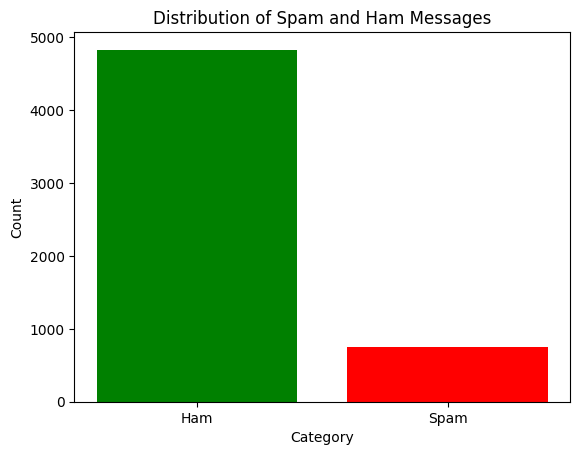

In [14]:
spam_count = labels.count(1)
ham_count = labels.count(0)

# Data for the bar chart
categories = ['Ham', 'Spam']
counts = [ham_count, spam_count]

# Create the bar plot
plt.bar(categories, counts, color=['green', 'red'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [15]:
import numpy as np
feature = np.array(feature)
feature.shape

(5574, 1000)

In [16]:
labels = np.array(labels)
labels.shape

(5574,)

In [17]:
from sklearn.model_selection import train_test_split

# Example data (replace with your actual data)
X = feature  # Your features
y = labels   # Your labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


In [18]:
X_train.shape

(4459, 1000)

In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [20]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [21]:
new_email = "message 3	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [22]:
sample =[]
for i in word_dict:
    sample.append(new_email.split(" ").count(i[0]))
    

In [23]:
len(sample)

1000

In [24]:
sample = np.array(sample)

In [25]:
classifier.predict(sample.reshape(1,1000))

array([1])

In [26]:
y_pred_NB = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score_NB = accuracy_score(y_pred_NB,y_test)
precision_NB = precision_score(y_pred_NB, y_test, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_NB = recall_score(y_pred_NB, y_test, average='binary')
f1_NB = f1_score(y_pred_NB, y_test, average='binary')
print("MultinomialNB")
print("accuracy : ",accuracy_score_NB)
print("Precision:", precision_NB)
print("Recall:", recall_NB)
print("F1 Score:", f1_NB)

MultinomialNB
accuracy :  0.967713004484305
Precision: 0.8993288590604027
Recall: 0.864516129032258
F1 Score: 0.881578947368421


In [39]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [40]:
# from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
accuracy_score_SVC = accuracy_score(y_pred_svm,y_test)
precision_SVC = precision_score(y_test, y_pred_svm, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_SVC = recall_score(y_test, y_pred_svm, average='binary')
f1_SVC = f1_score(y_test, y_pred_svm, average='binary')
print("SVC")
print("accuracy : ",accuracy_score_SVC)
print("Precision:", precision_SVC)
print("Recall:", recall_SVC)
print("F1 Score:", f1_SVC)

SVC
accuracy :  0.9757847533632287
Precision: 1.0
Recall: 0.8187919463087249
F1 Score: 0.9003690036900369


In [31]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred_DTC = DTC.predict(X_test)
accuracy_score_DTC = accuracy_score(y_test,y_pred_DTC)
precision_DTC = precision_score(y_test, y_pred_DTC, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_DTC = recall_score(y_test, y_pred_DTC, average='binary')
f1_DTC = f1_score(y_test, y_pred_DTC, average='binary')
print("DecisionTreeClassifier")
print("accuracy : ",accuracy_score_DTC)
print("Precision:", precision_DTC)
print("Recall:", recall_DTC)
print("F1 Score:", recall_DTC)

DecisionTreeClassifier
accuracy :  0.957847533632287
Precision: 0.8445945945945946
Recall: 0.8389261744966443
F1 Score: 0.8389261744966443


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score_rf = accuracy_score(y_pred_rf,y_test)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
print("RandomForestClassifier")
print("accuracy : ",accuracy_score_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

RandomForestClassifier
accuracy :  0.979372197309417
Precision: 0.9846153846153847
Recall: 0.8590604026845637
F1 Score: 0.9175627240143369


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy_score_gbc = accuracy_score(y_test,y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_gbc = recall_score(y_test, y_pred_gbc, average='binary')
f1_gbc = f1_score(y_test, y_pred_gbc, average='binary')
print("GradientBoostingClassifier")
print("accuracy : ",accuracy_score_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1 Score:", f1_gbc)


GradientBoostingClassifier
accuracy :  0.9587443946188341
Precision: 0.9813084112149533
Recall: 0.7046979865771812
F1 Score: 0.8203125


Confusion Matrix:
[[945  21]
 [ 15 134]]


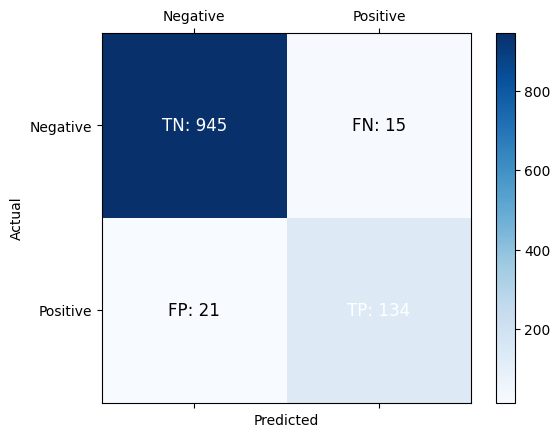

In [35]:
cm = confusion_matrix(y_test, y_pred_NB)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true positives, false positives, true negatives, false negatives
tn, fp, fn, tp = cm.ravel()

fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar(cax)

# Add labels to the matrix
ax.text(0, 0, f'TN: {tn}', va='center', ha='center', fontsize=12, color='white')
ax.text(0, 1, f'FP: {fp}', va='center', ha='center', fontsize=12, color='black')
ax.text(1, 0, f'FN: {fn}', va='center', ha='center', fontsize=12, color='black')
ax.text(1, 1, f'TP: {tp}', va='center', ha='center', fontsize=12, color='white')

# Set axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Display the extracted values
# print(f"True Positives (TP): {tp}")
# print(f"True Negatives (TN): {tn}")
# print(f"False Positives (FP): {fp}")
# print(f"False Negatives (FN): {fn}")

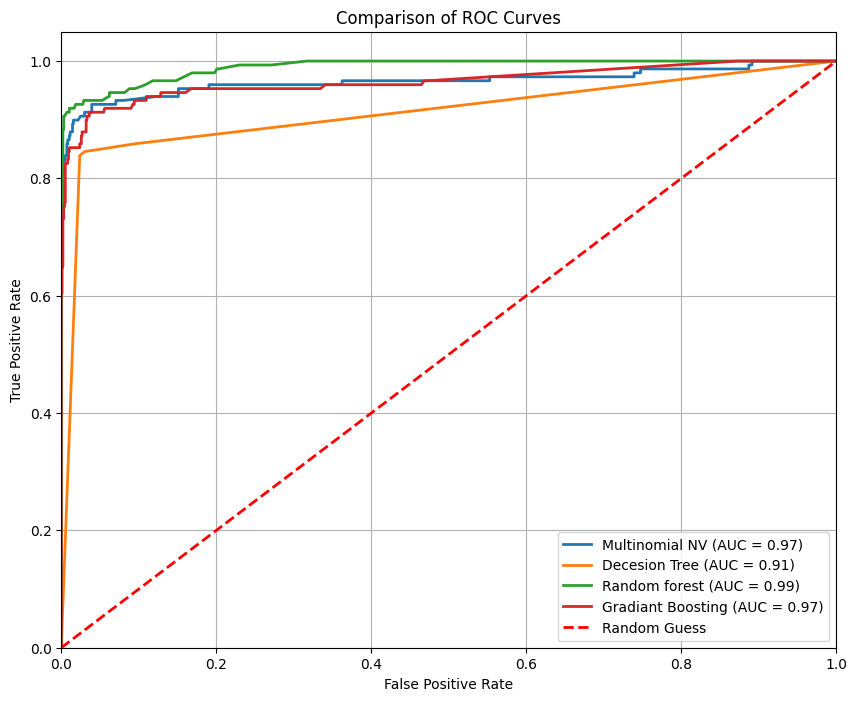

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test is the same for all models
models = {
    "Multinomial NV": classifier,  # Replace with your actual model variables
    "Decesion Tree": DTC,
    "Random forest": rf,
    "Gradiant Boosting" : gbc
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Predict probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the reference line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import pickle

# Save the model and word_dict using pickle after training
with open('model.pkl', 'wb') as model_file:
    pickle.dump((classifier, word_dict), model_file)

print("Model and word_dict saved successfully.")


In [ ]:
import pickle

# Train the model
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Save the model to a file
model_filename = 'spam_classifier_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)


In [ ]:
with open('word_dict.pkl', 'wb') as word_dict_file:
    pickle.dump(word_dict, word_dict_file)

In [ ]:
with open('spam_classifier_model.pkl', 'wb') as model_file:
    pickle.dump((classifier, word_dict), model_file)
